# Lesson #5

## Functions in pandas

In [1]:
import pandas as pd

In [12]:
# Narrow table only to > 0 orders
def watcher(param):
    return param != 0

df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})

df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,watcher
0,1,163,2,True
1,2,130,4,True
2,3,97,0,False


In [14]:
def conversion(row):
    '''Orders per click'''
    return row['orders'] / row['clicks']

df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})

# axis=1 means whole row is passed
# axis=0 means whole column is passed (by default)
df['conversion'] = df.apply(conversion, axis=1)
df

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


In [19]:
def metriks(row):
    '''Return whole column depending on user_id value'''
    return pd.Series({f'col_{row.user_id}': 1})

    # row['another_column'] = 1
    # return row

df = pd.DataFrame({'user_id': [1, 2, 3]})
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


Companies ads analysis (find most efficient search query for ads)

In [22]:
stats = pd.read_excel('data/test/ad_campaigns.xlsx')
# Rename df columns
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head(3)

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [25]:
phrase = 'МРТ на Менделеевской от 2000'
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head(2)

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [26]:
%matplotlib inline

<AxesSubplot:>

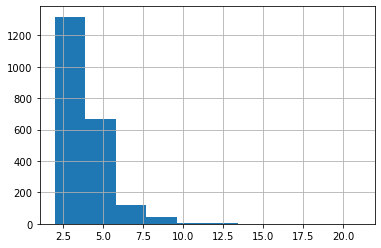

In [27]:
stats['word_count'].hist()

<AxesSubplot:>

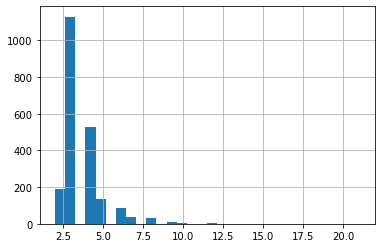

In [28]:
stats['word_count'].hist(bins=30)

Exercise - find queries with biggest number of words in a phrase

In [36]:
stats.sort_values('word_count', ascending=False).head(3)

,group,phrase,effect,ad_id,title,text,link,word_count
2131,мрт на кутузовском проспекте,сделать мрт в москве -где -головы -дешевле -ка...,8.1,3401169397,Сделайте МРТ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,21
1756,в москва мрт скидка со,в москва мрт сделать -где -голова -дешево -кач...,8.0,2428554769,Сделайте МРТ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,17
29,мрт куркино,мрт на алексеевской -головы -м -метро -мытищин...,6.3,2101705038,МРТ в Москве от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,12


In [35]:
stats.word_count.sort_values(ascending=False).head(3)

2131    21
1756    17
29      12
Name: word_count, dtype: int64

Get utm_campaign

In [38]:
from urllib import parse

In [44]:
parsed = parse.urlsplit('https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_%7Bdevice_type%7D')
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_%7Bdevice_type%7D', fragment='')

In [47]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [49]:
params['utm_campaign']

['a825749b87']

In [56]:
def get_campaign(url):
    parsed_url = parse.urlsplit(url)
    params = parse.parse_qs(parsed_url.query)
    campaign = params['utm_campaign'][0]
    return campaign
    

stats['utm_campaign'] = stats['link'].apply(get_campaign)
stats.head(3)

,group,phrase,effect,ad_id,title,text,link,word_count,utm_campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
